<a href="https://colab.research.google.com/github/Loveena28/salary-prediction/blob/project-add/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction Model**
## Name : Loveena Ramchandani
## Enrollment No. : EN19CS301186
## Concept Used : Supervised Machine Learning
## Algorithm : Linear Regression

#### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/CSCult/salary-prediction/main/Salary_Data.csv")

#### Exploring the dataset

In [ ]:
# First five rows of the dataset
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Last five rows of the dataset
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
# Statistical summary of the dataset
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Shape of the dataset
data.shape

(30, 2)

In [ ]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

##### **This shows that there are no null values in the dataset.**

In [ ]:
# Bifurcating the dataset into features and labels
x = data.iloc[:,0].values
y = data.iloc[:,-1].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

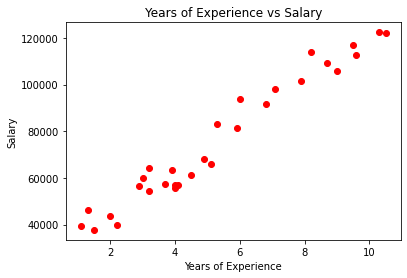

In [ ]:
# Scatter Plot
plt.scatter(x,y,marker='o',color='red')
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

##### **We can see from the scatter plot that Salary varies linearly with Years of Experience.**

#### Create Train and Test Sets

In [ ]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

#### Building and Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
# Instantiating the LinearRegression object
reg = LinearRegression()

In [ ]:
# Training the model
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

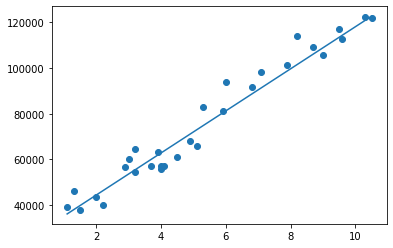

In [ ]:
# Plotting the regression line
line = reg.coef_*x + reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [ ]:
# Predicting the output
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Predicted':np.around(y_pred.flatten(),decimals=0),'Actual':Y_test.flatten()})

   Predicted    Actual
0    74821.0   83088.0
1    91385.0   98273.0
2    61938.0   63218.0
3    81263.0   93940.0
4    67460.0   61111.0
5    88625.0   91738.0
6   113471.0  116969.0
7    44454.0   43525.0
8   106109.0  109431.0


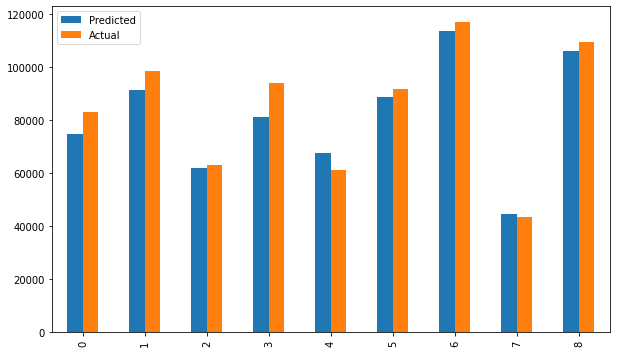

In [ ]:
print(df)
df.plot(kind='bar',figsize=(10,6))

#### Testing the model using user data

In [ ]:
sal = reg.predict([[5]])
print("If a person has 5 years of experience then his salary would be approximate {}".format(sal[0]))

If a person has 5 years of experience then his salary would be approximate [72060.74570672]


#### Model Evaluation

In [ ]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print("Mean Absolute Error : ",round(metrics.mean_absolute_error(Y_test,y_pred),2))
print("R-squared  : ",r2_score(Y_test,y_pred))
print("Accuracy of the model : {} % ".format(round(reg.score(X_test,Y_test)*100,2)))

Mean Absolute Error :  5146.89
R-squared  :  0.9248580247217075
Accuracy of the model : 92.49 % 
